In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
combined_data_together_overall = pd.read_excel("Monthly Data.xlsx", usecols=lambda x: 'Unnamed' not in x)

In [3]:
combined_data_together_overall

,Year_Month,live births no.,Total Infant Deaths,number of marriages,CPI values(seasonally adjusted),CPI values(non-seasonally adjusted),"Inflation(CPI % change from previous month, seasonally adjusted)","Inflation(CPI % change from previous month, non-seasonally adjusted)",Resale House Avg Price,Resale Houses Sold
0,1960-01-01,4981,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,4596,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,4964,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,4904,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,5244,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,3005,7,1138.0,109.679,109.863,0.004736,0.009436,550441.032430,2309.0
752,2022-09-01,3272,7,2211.0,110.154,110.339,0.004331,0.004333,564887.631008,2580.0
753,2022-10-01,3109,4,2024.0,110.223,109.893,0.000626,-0.004042,568734.051469,1960.0
754,2022-11-01,2943,7,2445.0,110.773,110.959,0.004990,0.009700,557752.336304,2132.0


## Classification of Live Births (Increasing/Decreasing)

In [4]:
monthly_live_birth = combined_data_together_overall.iloc[:, :2]
monthly_live_birth

,Year_Month,live births no.
0,1960-01-01,4981
1,1960-02-01,4596
2,1960-03-01,4964
3,1960-04-01,4904
4,1960-05-01,5244
...,...,...
751,2022-08-01,3005
752,2022-09-01,3272
753,2022-10-01,3109
754,2022-11-01,2943


In [5]:
live_birth_monthly_change = pd.DataFrame(columns=["Year_Month", "Change in Live Birth"])
for i in range(1, monthly_live_birth.shape[0]):
    if ((monthly_live_birth.iloc[i, 1] - monthly_live_birth.iloc[i-1, 1]) > 0):
        change = "INCREASE"
    else:
        change = "DECREASE"
    live_birth_monthly_change.loc[i] = [monthly_live_birth.iloc[i, 0], change]   
live_birth_monthly_change

,Year_Month,Change in Live Birth
1,1960-02-01,DECREASE
2,1960-03-01,INCREASE
3,1960-04-01,DECREASE
4,1960-05-01,INCREASE
5,1960-06-01,DECREASE
...,...,...
751,2022-08-01,INCREASE
752,2022-09-01,INCREASE
753,2022-10-01,DECREASE
754,2022-11-01,DECREASE


## Converting to Change Dataset

In [6]:
combined_changed_data_together_overall = pd.DataFrame(combined_data_together_overall.iloc[1:,0])
for i in range(1, combined_data_together_overall.shape[1]):    
    for j in range(1, combined_data_together_overall.shape[0]):
        combined_changed_data_together_overall.loc[j, i] = combined_data_together_overall.iloc[j, i] - combined_data_together_overall.iloc[j-1, i]
combined_changed_data_together_overall.columns = ["Year_Month", "Change in Live Birth Number", "Change in Total Infant Death", "Change in number of marriages", "Change in CPI(Inflation rate)(adjusted)", "Change in CPI(Inflation rate)(non-adjusted)", "Change in Inflation(adjusted)", "Change in Inflation(non-adjusted)", "Change in Resale House Avg Price", "Change in Number of Reslae Houses Sold"]
combined_changed_data_together_overall.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])
combined_changed_data_together_overall

,Year_Month,Change in Live Birth,Change in Live Birth Number,Change in Total Infant Death,Change in number of marriages,Change in CPI(Inflation rate)(adjusted),Change in CPI(Inflation rate)(non-adjusted),Change in Inflation(adjusted),Change in Inflation(non-adjusted),Change in Resale House Avg Price,Change in Number of Reslae Houses Sold
1,1960-02-01,DECREASE,-385.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,INCREASE,368.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,DECREASE,-60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,INCREASE,340.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1960-06-01,DECREASE,-66.0,-32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,INCREASE,43.0,2.0,-384.0,0.517,1.027,-0.001467,0.007918,-8077.171721,-52.0
752,2022-09-01,INCREASE,267.0,0.0,1073.0,0.475,0.476,-0.000405,-0.005104,14446.598578,271.0
753,2022-10-01,DECREASE,-163.0,-3.0,-187.0,0.069,-0.446,-0.003704,-0.008375,3846.420462,-620.0
754,2022-11-01,DECREASE,-166.0,3.0,421.0,0.550,1.066,0.004363,0.013742,-10981.715165,172.0


## Converting to % Change Dataset

In [7]:
combined_changed_data_together_overall_percent = pd.DataFrame(combined_data_together_overall.iloc[1:,0])
for i in range(1, combined_data_together_overall.shape[1]):    
    for j in range(1, combined_data_together_overall.shape[0]):
        combined_changed_data_together_overall_percent.loc[j, i] = (combined_changed_data_together_overall.iloc[j-1, i+1])/(combined_data_together_overall.iloc[j-1, i])
combined_changed_data_together_overall_percent.columns = ["Year_Month", "Change in Live Birth Number", "Change in Total Infant Death", "Change in number of marriages", "Change in CPI(Inflation rate)(adjusted)", "Change in CPI(Inflation rate)(non-adjusted)", "Change in Inflation(adjusted)", "Change in Inflation(non-adjusted)", "Change in Resale House Avg Price", "Change in Number of Reslae Houses Sold"]
combined_changed_data_together_overall_percent.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])
combined_changed_data_together_overall_percent 

/var/folders/51/ry5gb8r14r3c4t1pt9r3p3vh0000gn/T/ipykernel_71192/3722523294.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  combined_changed_data_together_overall_percent.loc[j, i] = (combined_changed_data_together_overall.iloc[j-1, i+1])/(combined_data_together_overall.iloc[j-1, i])
/var/folders/51/ry5gb8r14r3c4t1pt9r3p3vh0000gn/T/ipykernel_71192/3722523294.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  combined_changed_data_together_overall_percent.loc[j, i] = (combined_changed_data_together_overall.iloc[j-1, i+1])/(combined_data_together_overall.iloc[j-1, i])
/var/folders/51/ry5gb8r14r3c4t1pt9r3p3vh0000gn/T/ipykernel_71192/3722523294.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  combined_changed_data_together_overall_percent.loc[j, i] = (combined_changed_data_together_overall.iloc[j-1, i+1])/(combined_data_together_overall.iloc[j-1, i])


,Year_Month,Change in Live Birth,Change in Live Birth Number,Change in Total Infant Death,Change in number of marriages,Change in CPI(Inflation rate)(adjusted),Change in CPI(Inflation rate)(non-adjusted),Change in Inflation(adjusted),Change in Inflation(non-adjusted),Change in Resale House Avg Price,Change in Number of Reslae Houses Sold
1,1960-02-01,DECREASE,-0.077294,-0.019108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-03-01,INCREASE,0.080070,0.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,DECREASE,-0.012087,0.021164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-05-01,INCREASE,0.069331,0.217617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1960-06-01,DECREASE,-0.012586,-0.136170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,2022-08-01,INCREASE,0.014517,0.400000,-0.252300,0.004736,0.009436,-0.236534,5.214806,-0.014462,-0.022025
752,2022-09-01,INCREASE,0.088852,0.000000,0.942882,0.004331,0.004333,-0.085569,-0.540847,0.026245,0.117367
753,2022-10-01,DECREASE,-0.049817,-0.428571,-0.084577,0.000626,-0.004042,-0.855363,-1.932933,0.006809,-0.240310
754,2022-11-01,DECREASE,-0.053393,0.750000,0.208004,0.004990,0.009700,6.966025,-3.399835,-0.019309,0.087755


## EDA on Raw Data

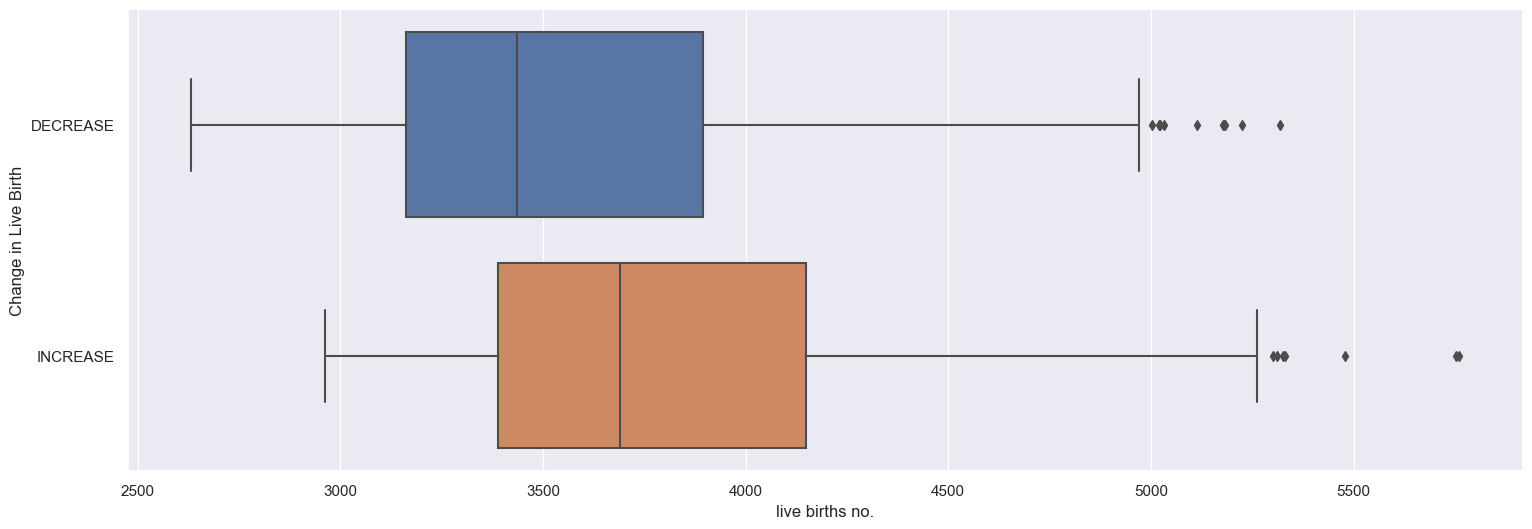

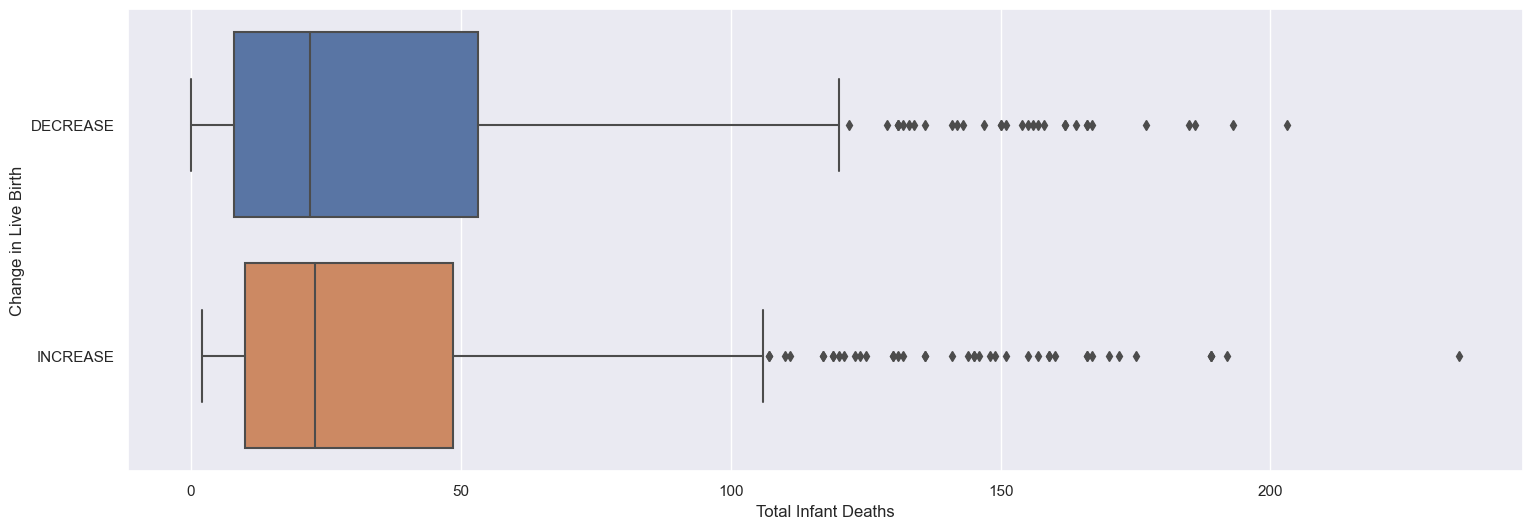

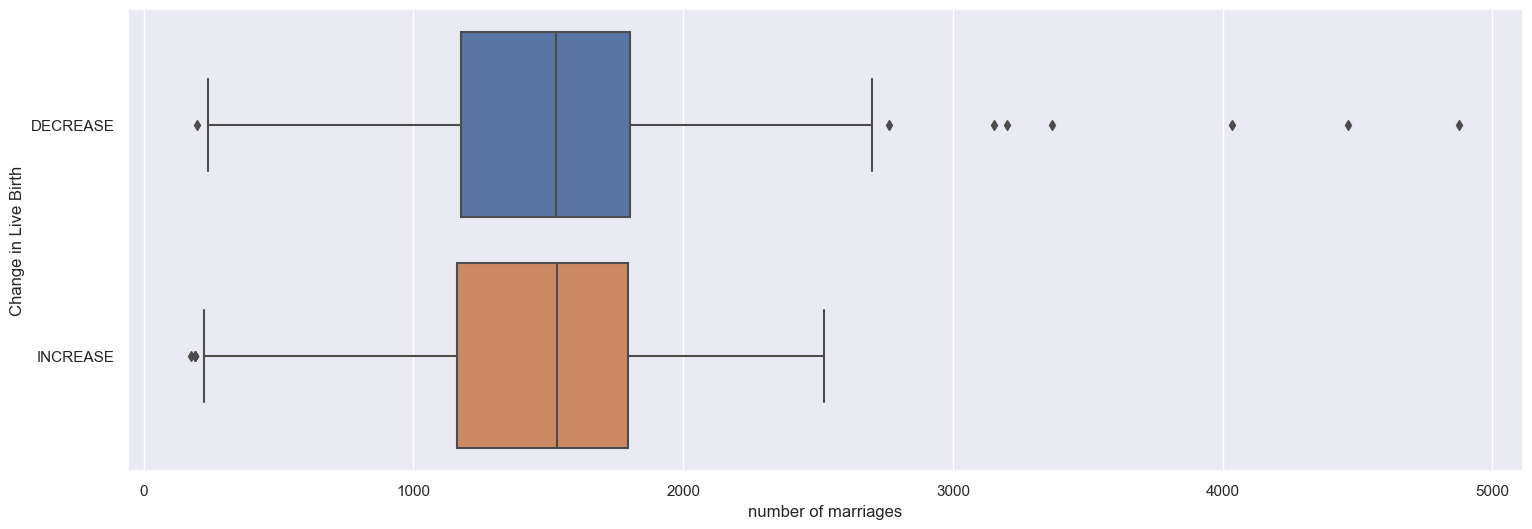

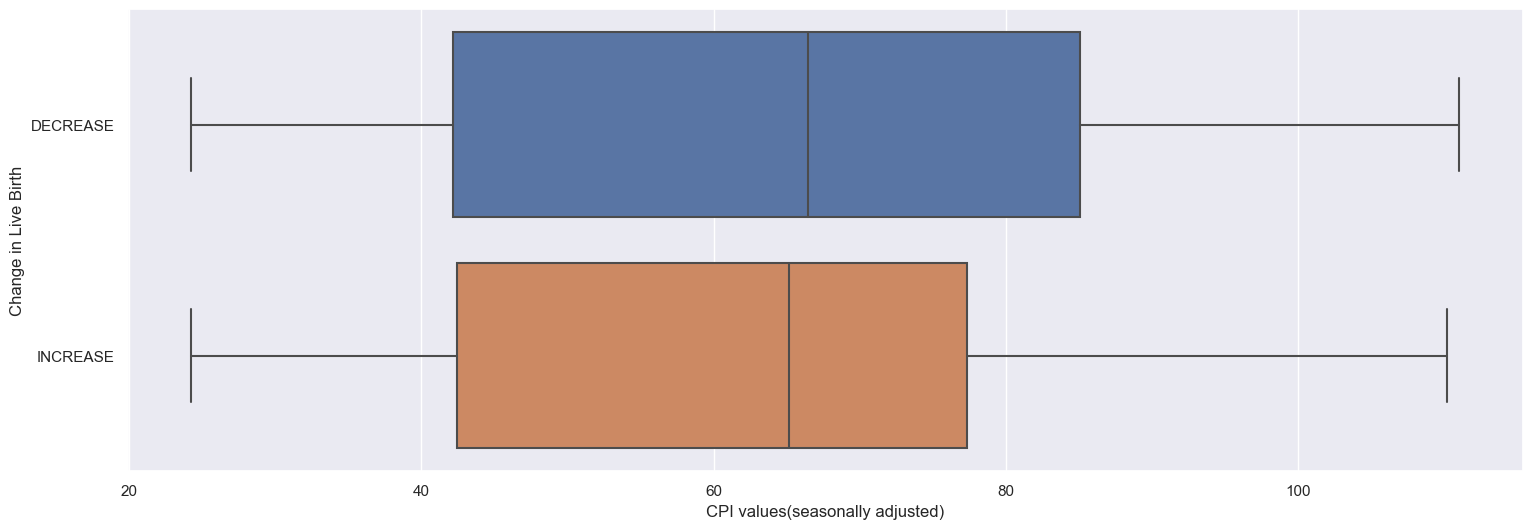

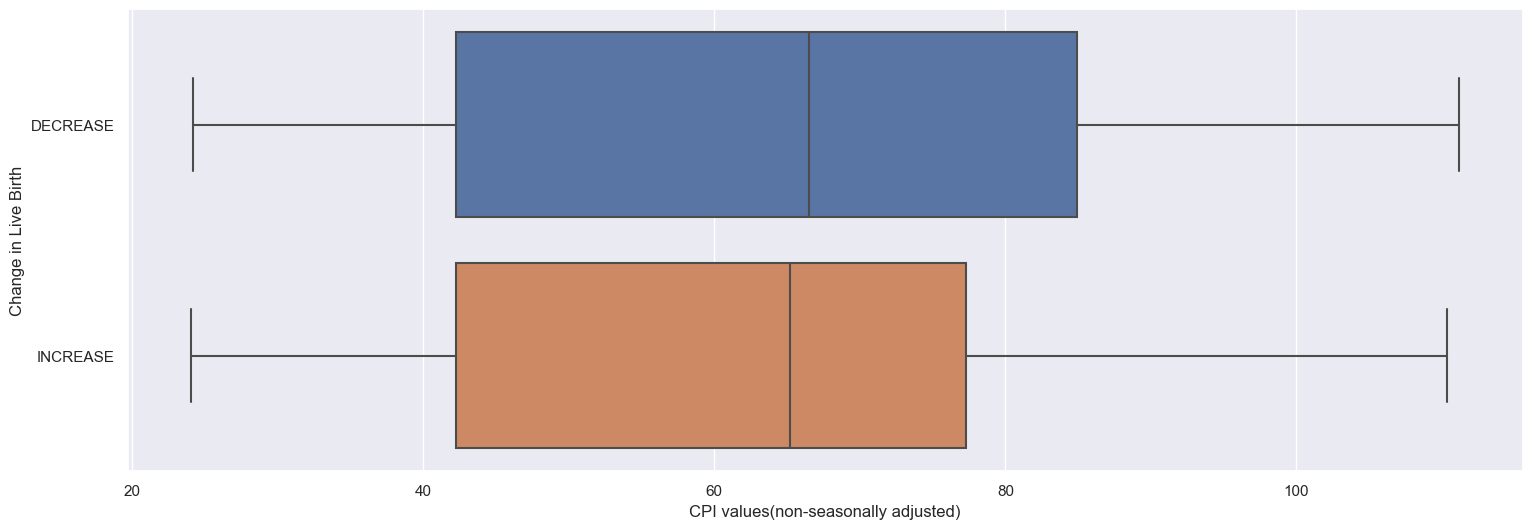

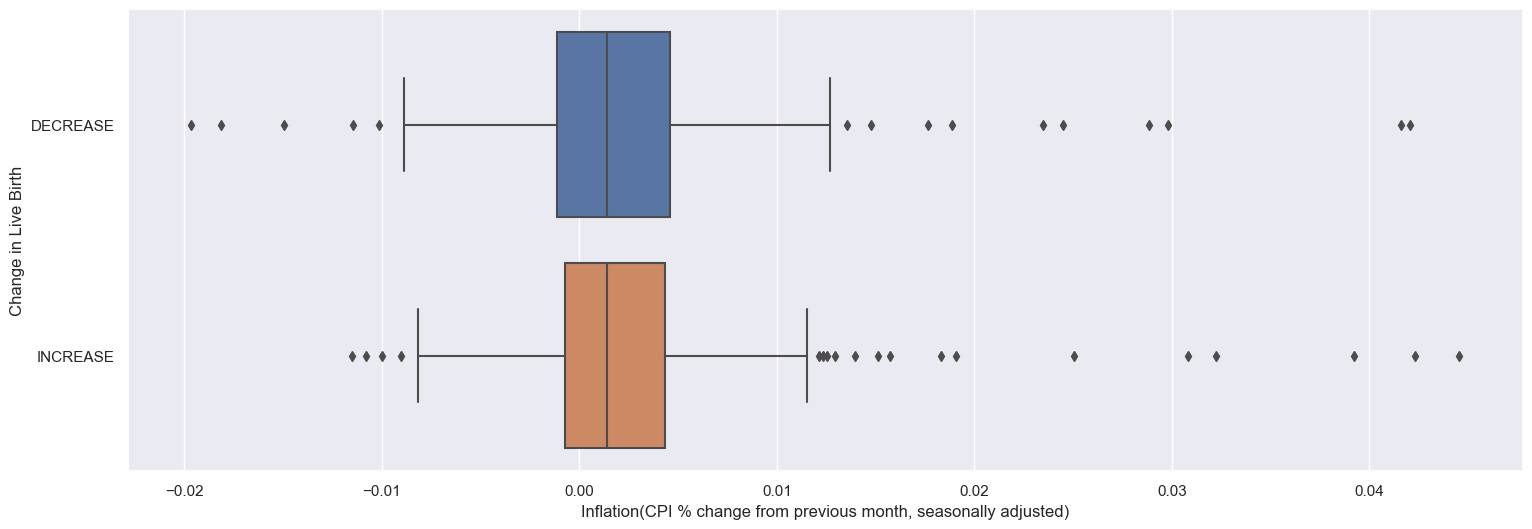

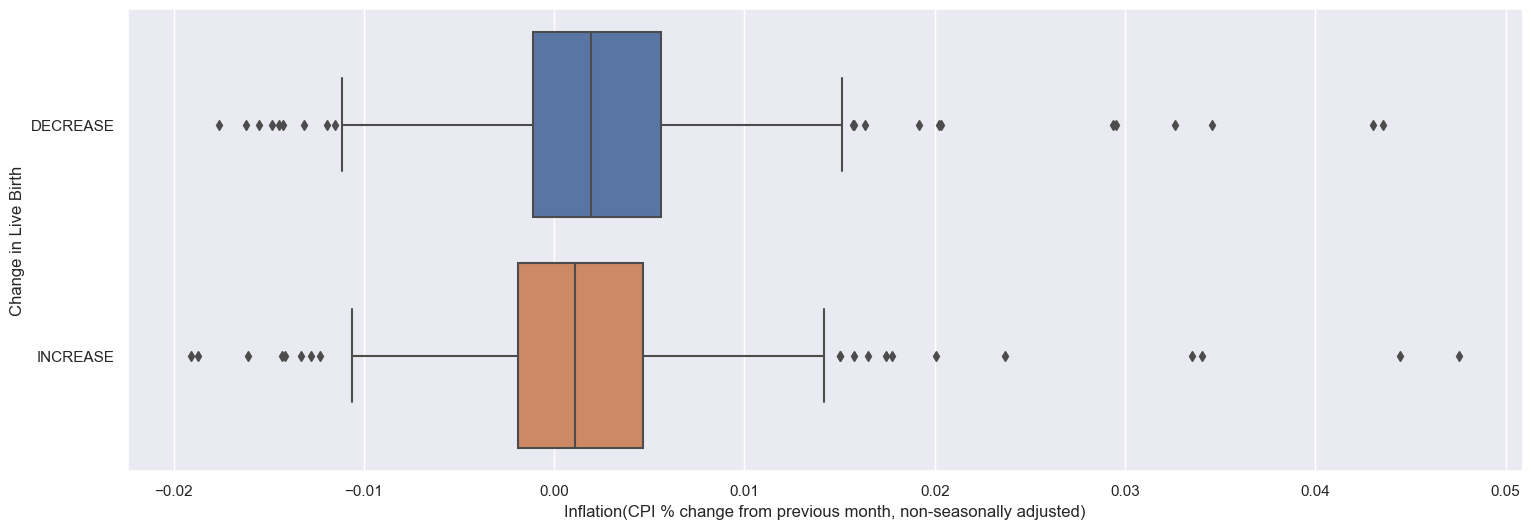

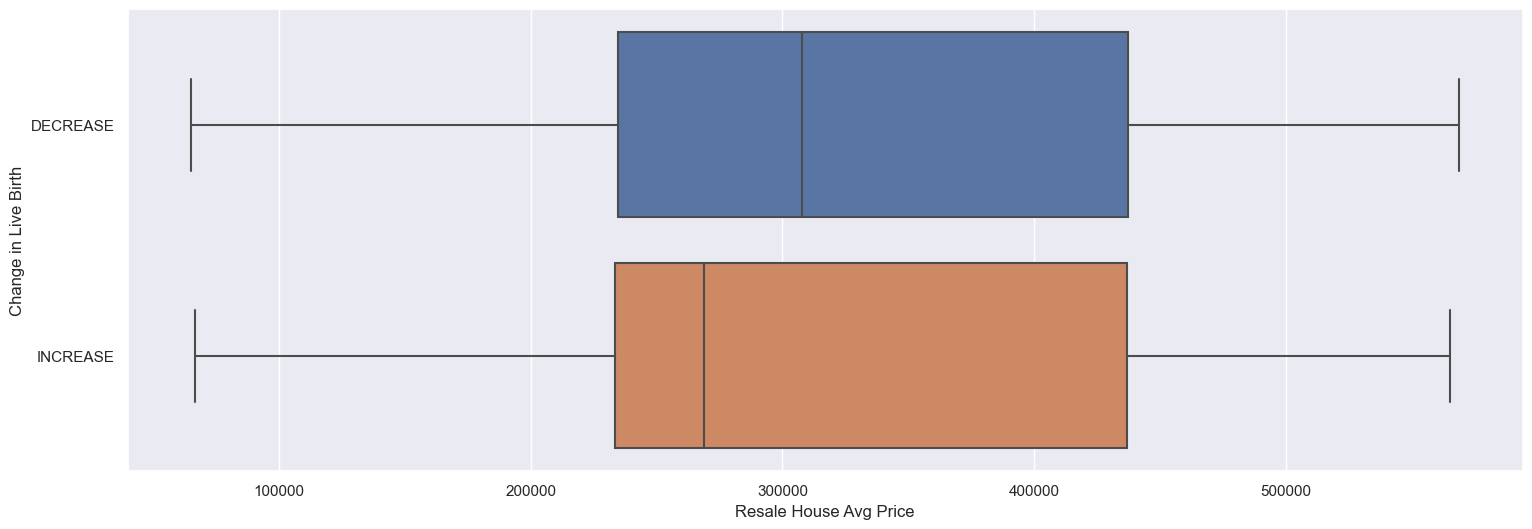

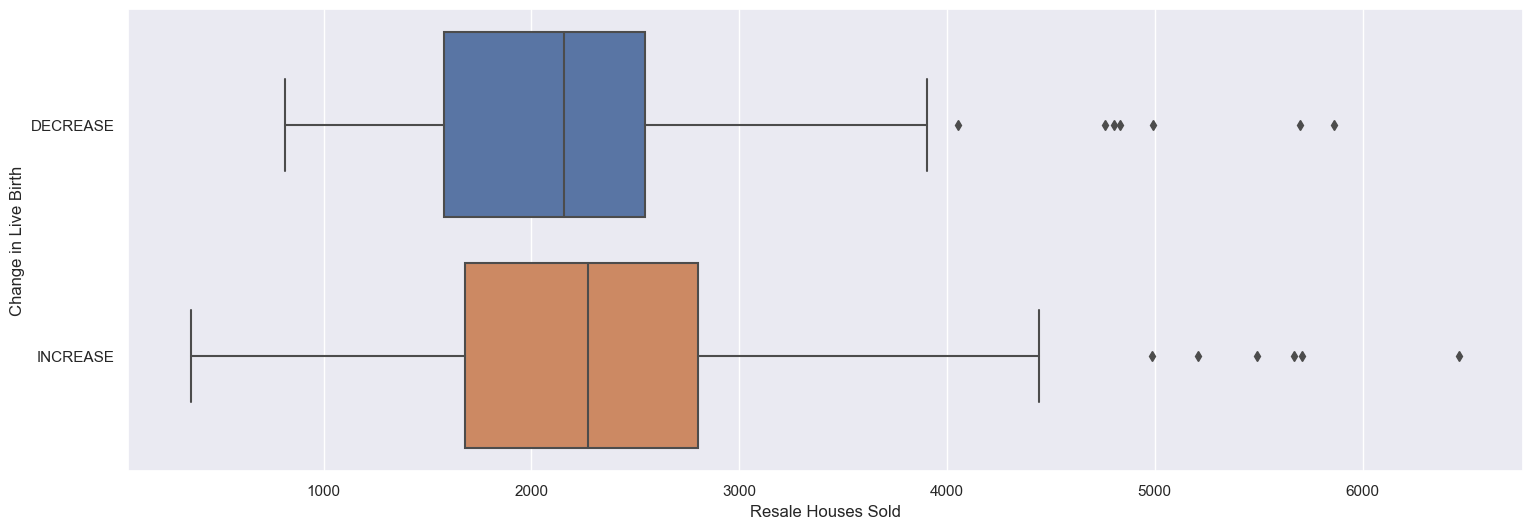

In [8]:
combined_data_together_overall_temp = combined_data_together_overall.iloc[1:,:].copy()
combined_data_together_overall_temp.insert(1, live_birth_monthly_change.columns[1], live_birth_monthly_change.iloc[:, 1])
for col in combined_data_together_overall_temp.columns[2:]:
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = col, y = "Change in Live Birth", data = combined_data_together_overall_temp, orient = "h")

## EDA on Change Data

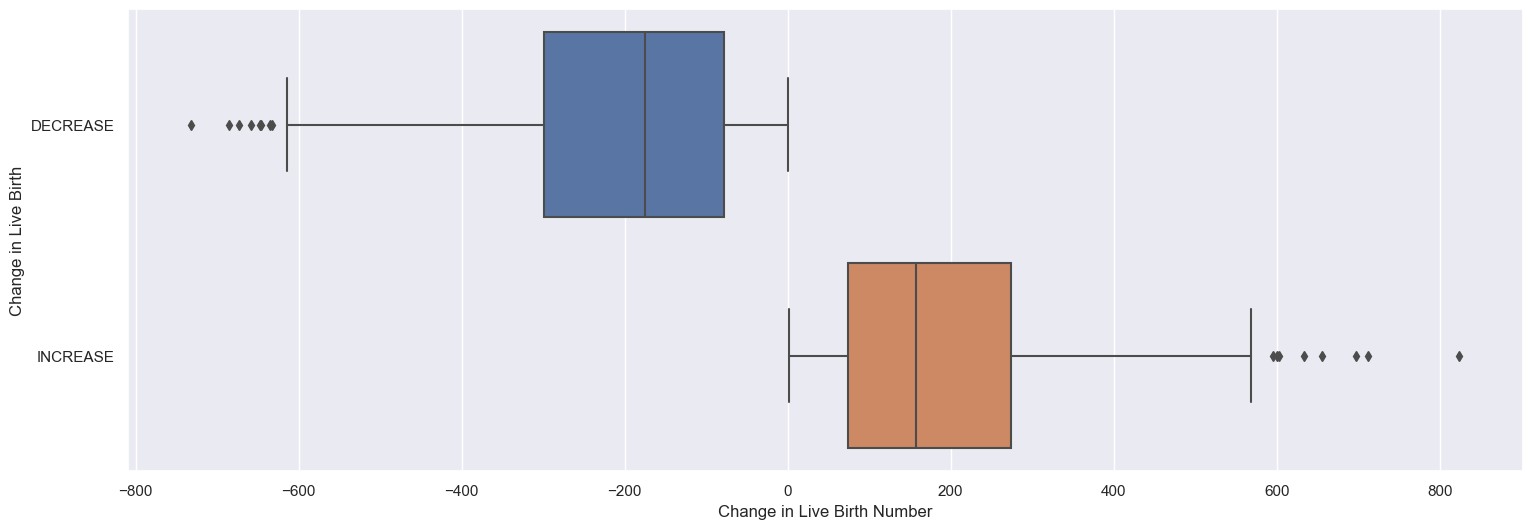

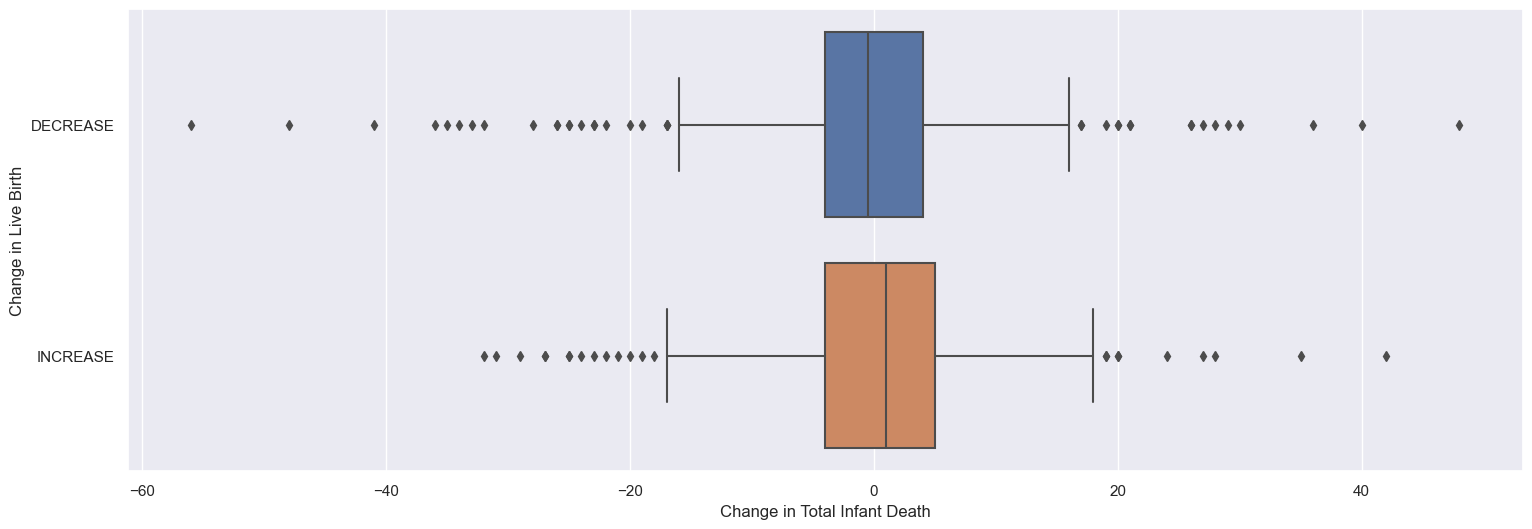

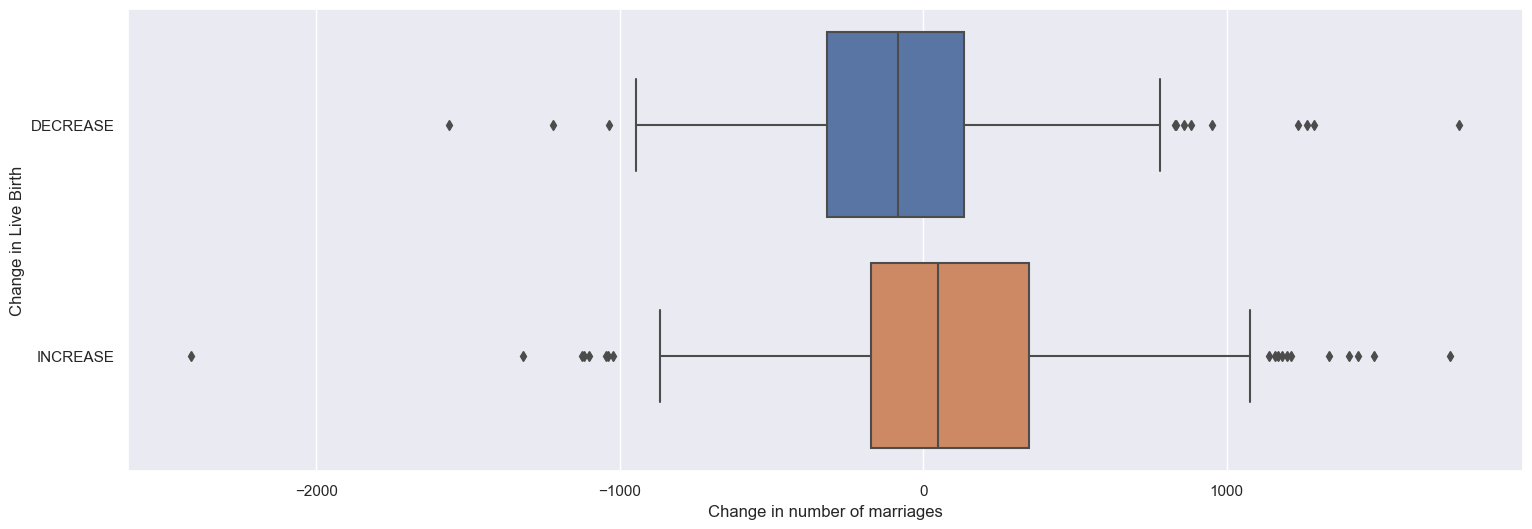

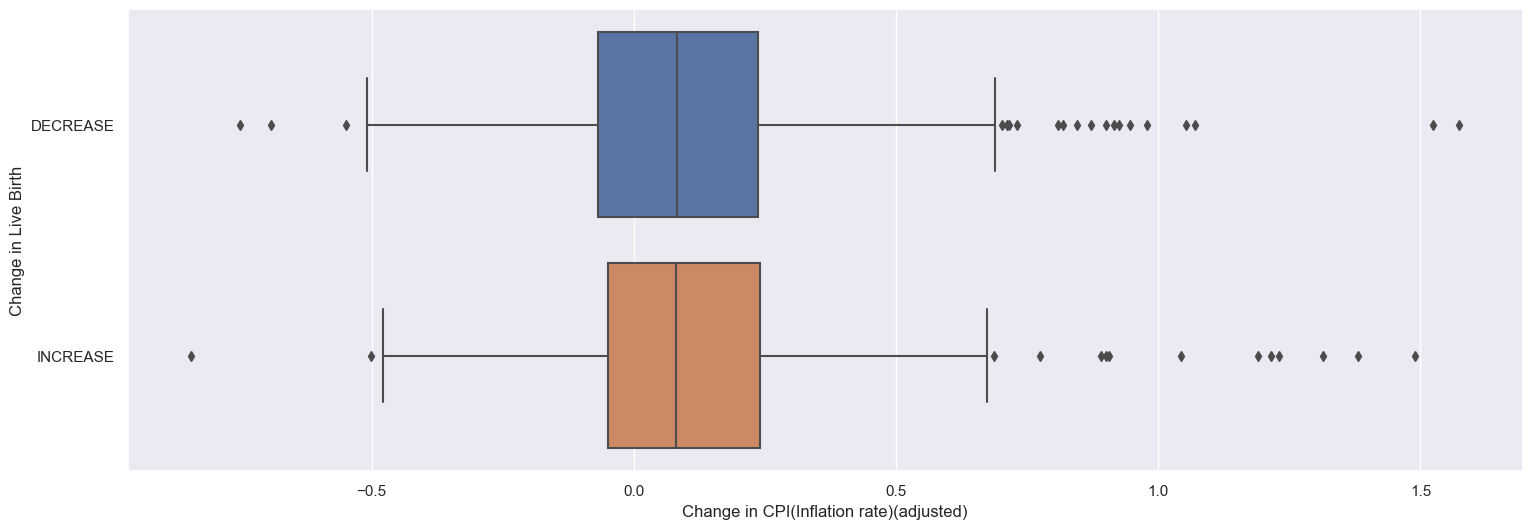

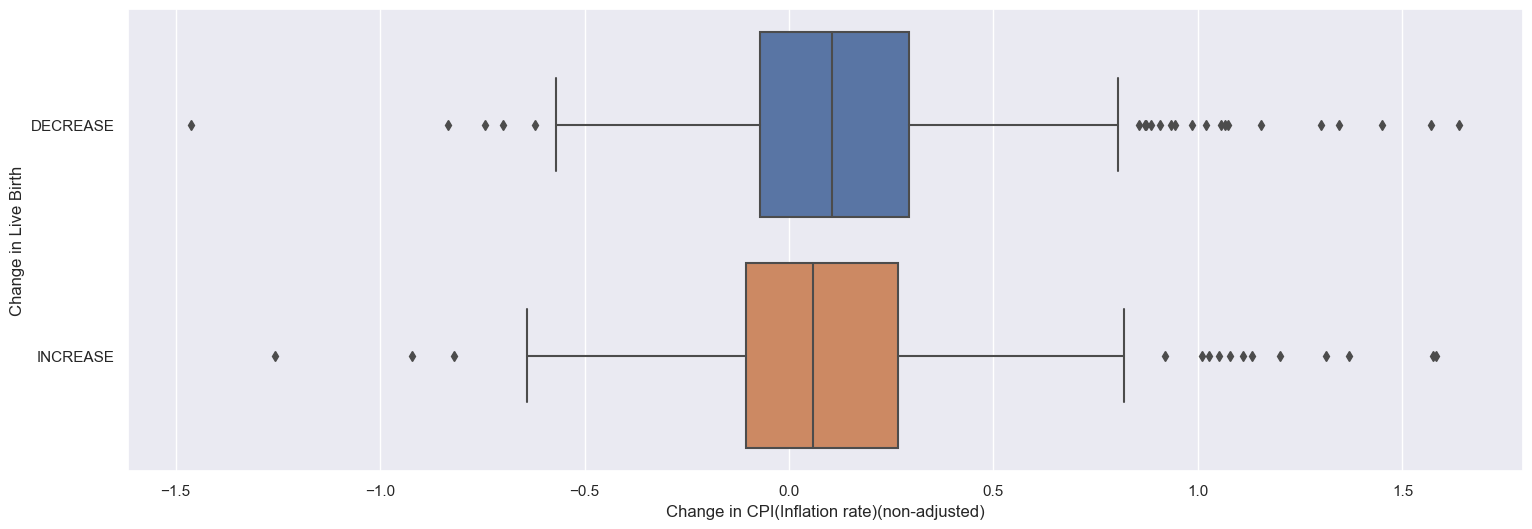

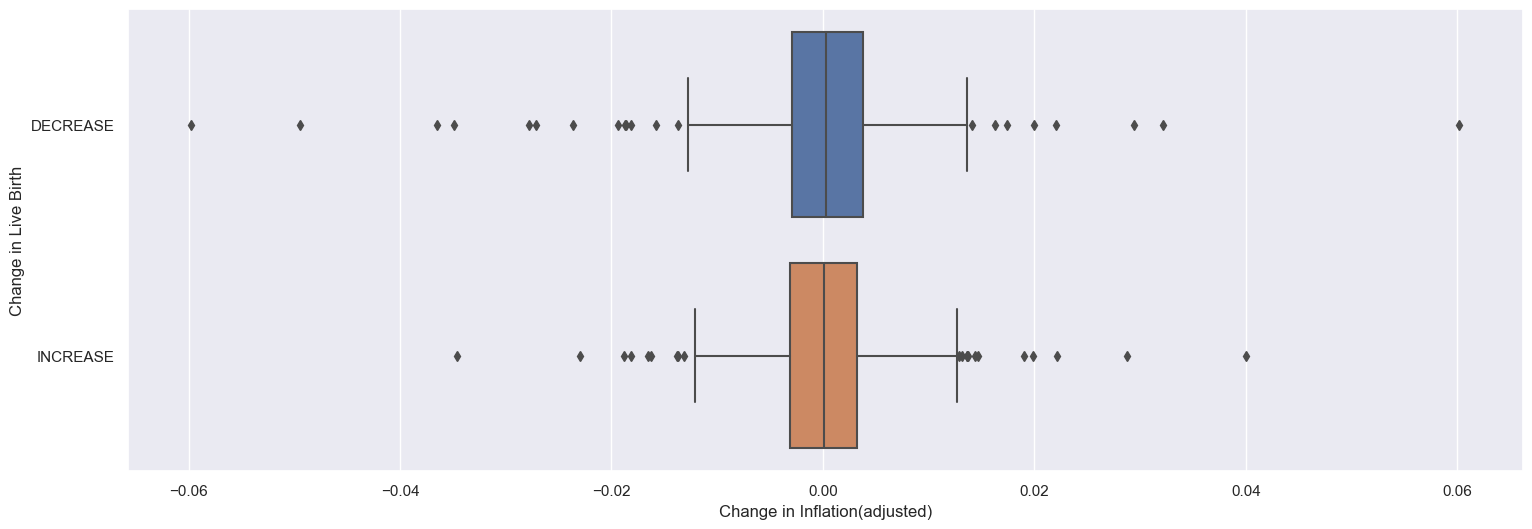

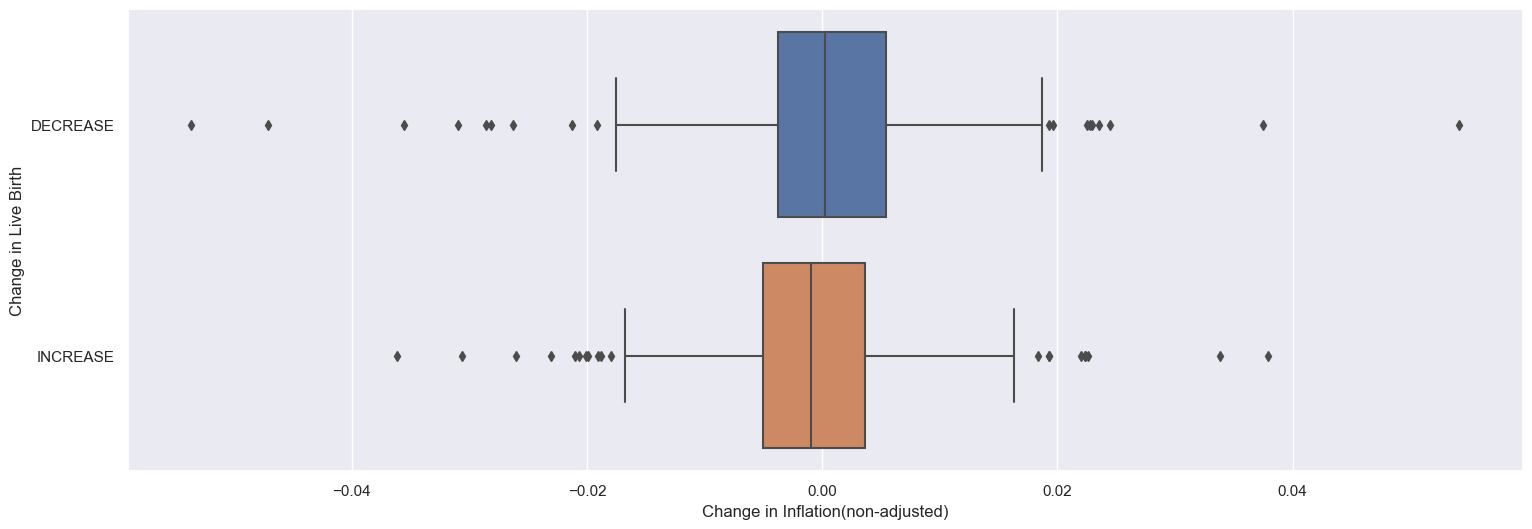

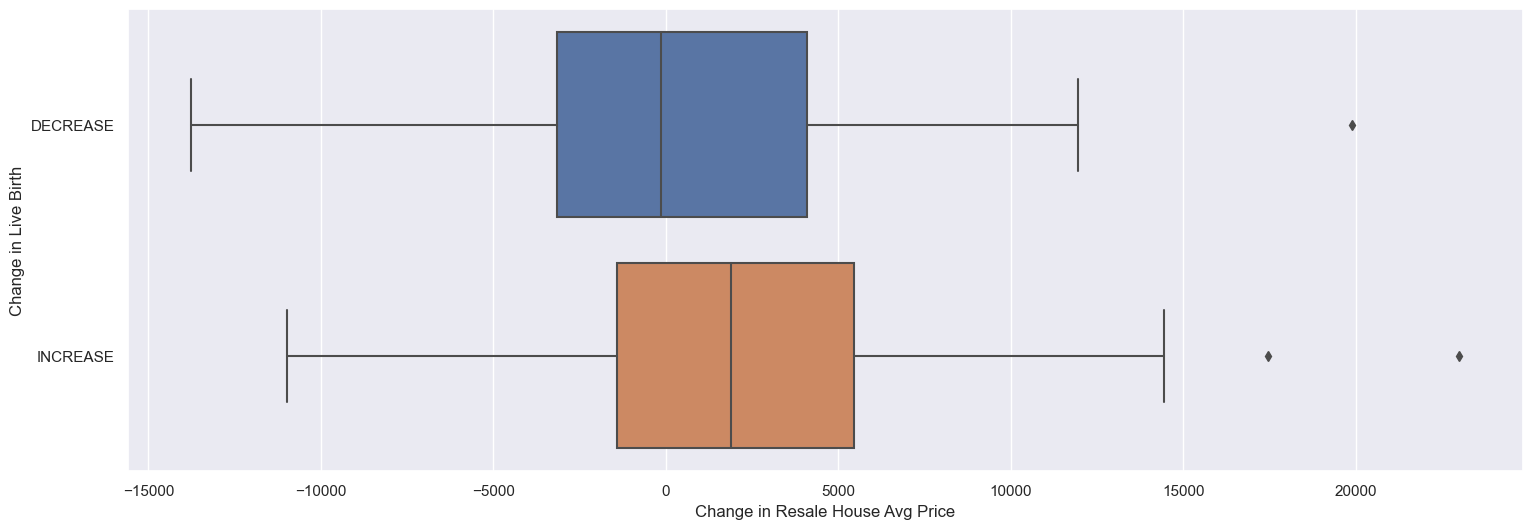

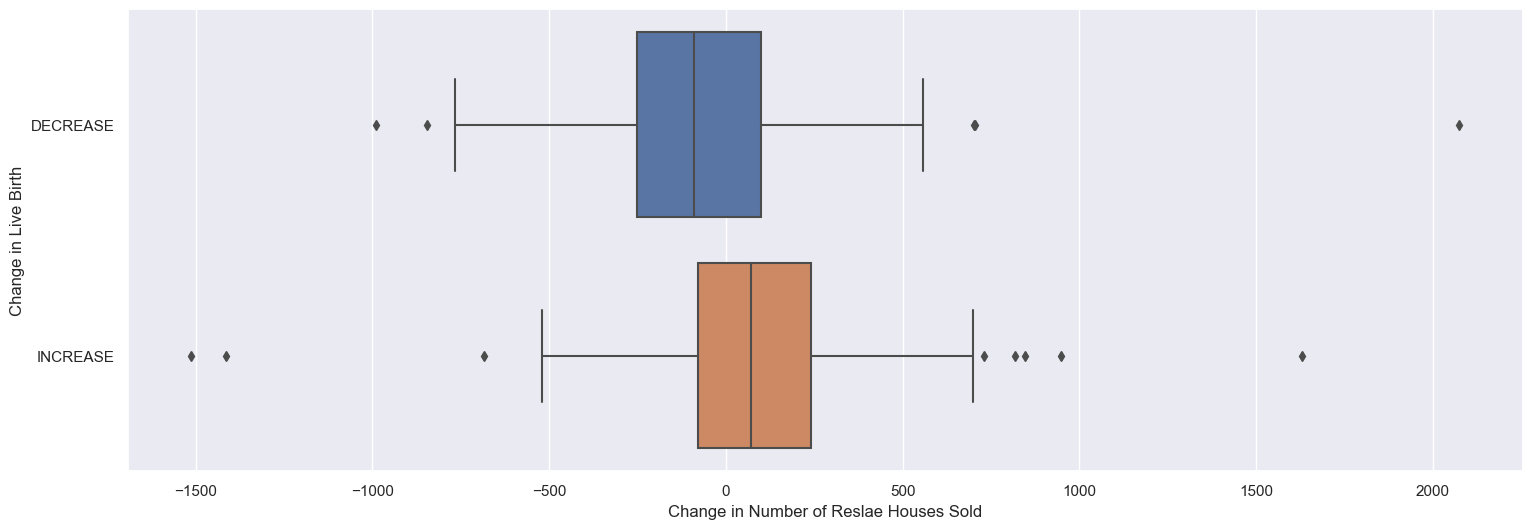

In [9]:
for col in combined_changed_data_together_overall.columns[2:]:
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = col, y = "Change in Live Birth", data = combined_changed_data_together_overall, orient = "h")

## EDA on % Change Data

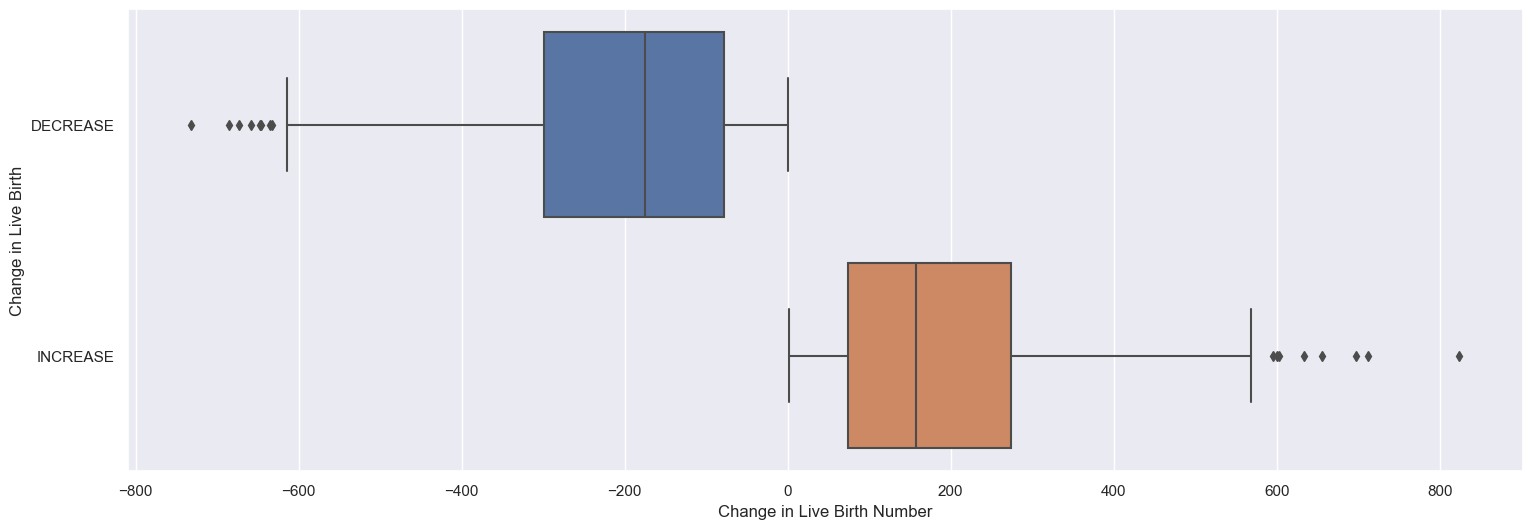

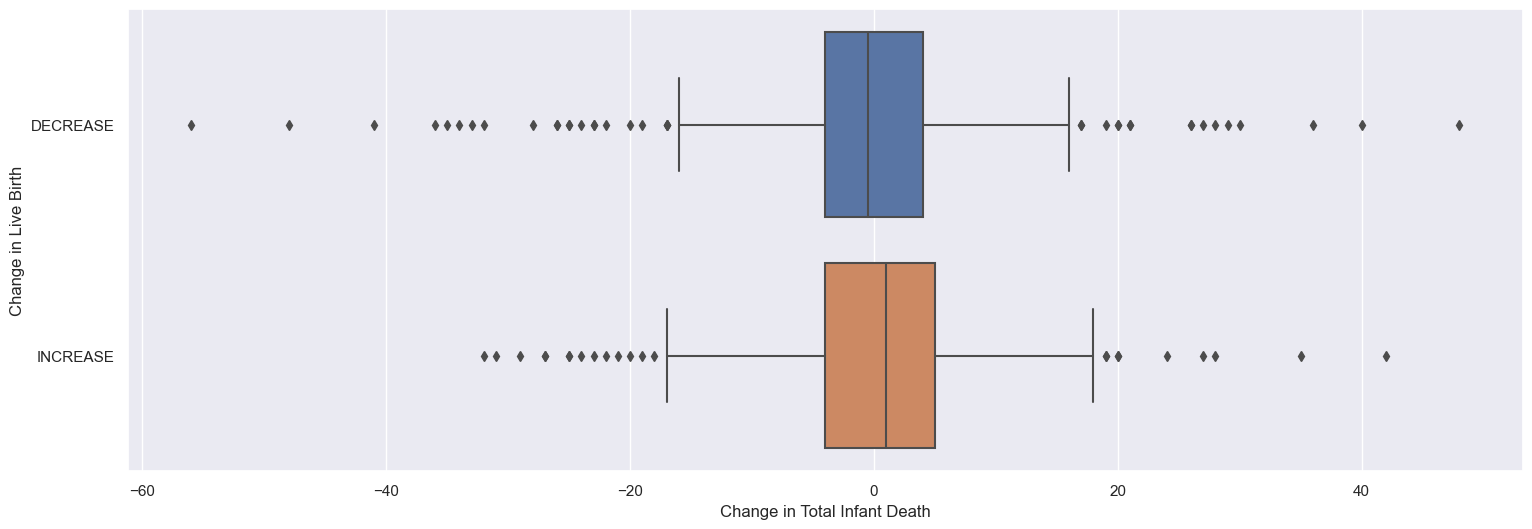

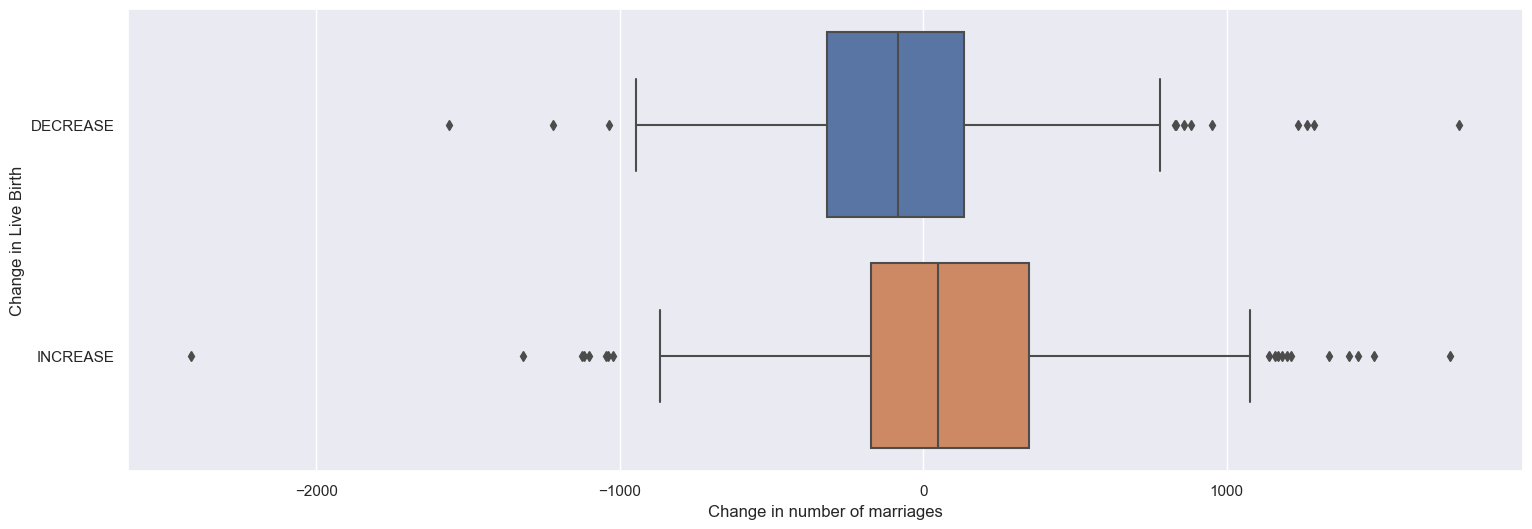

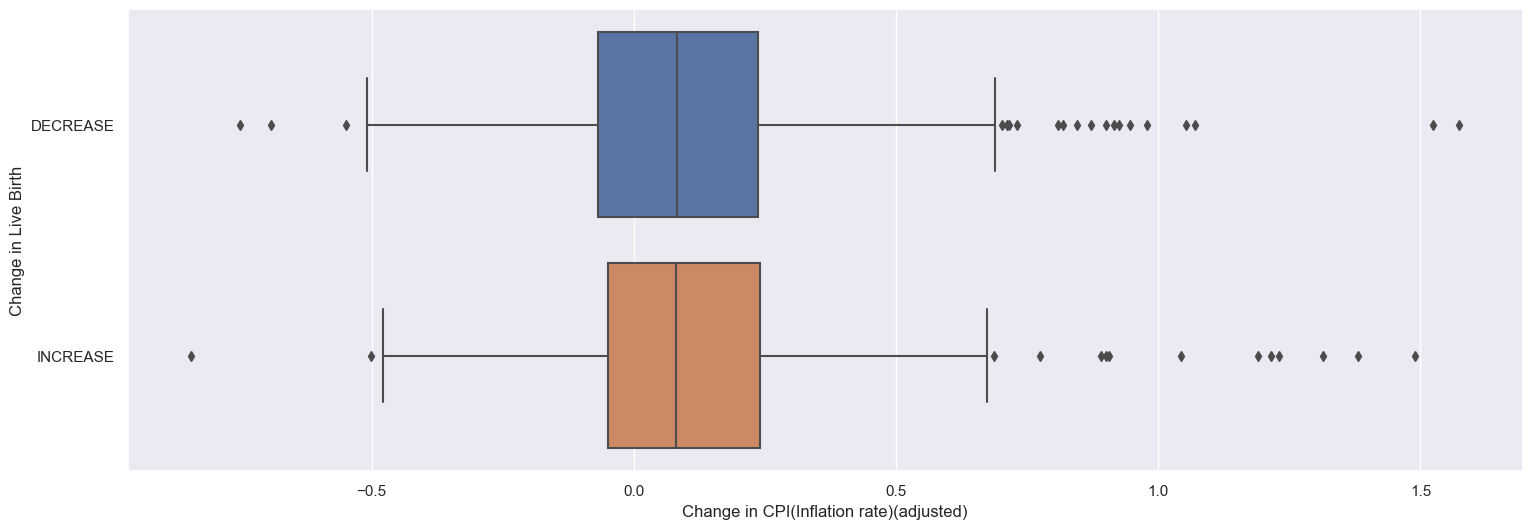

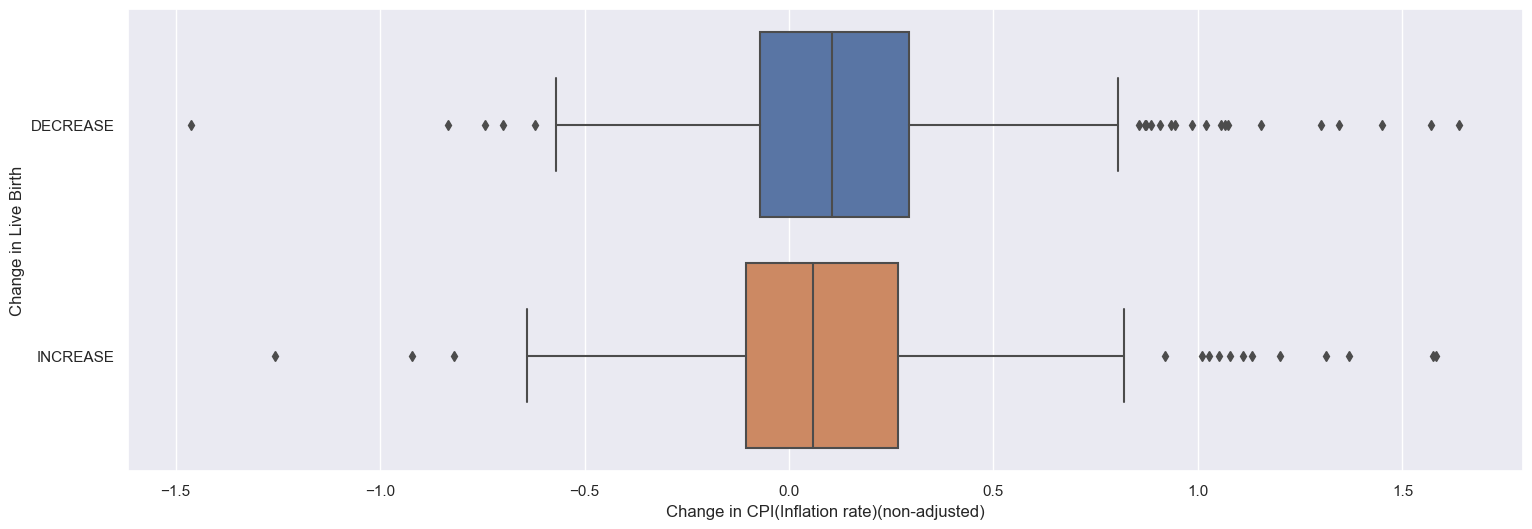

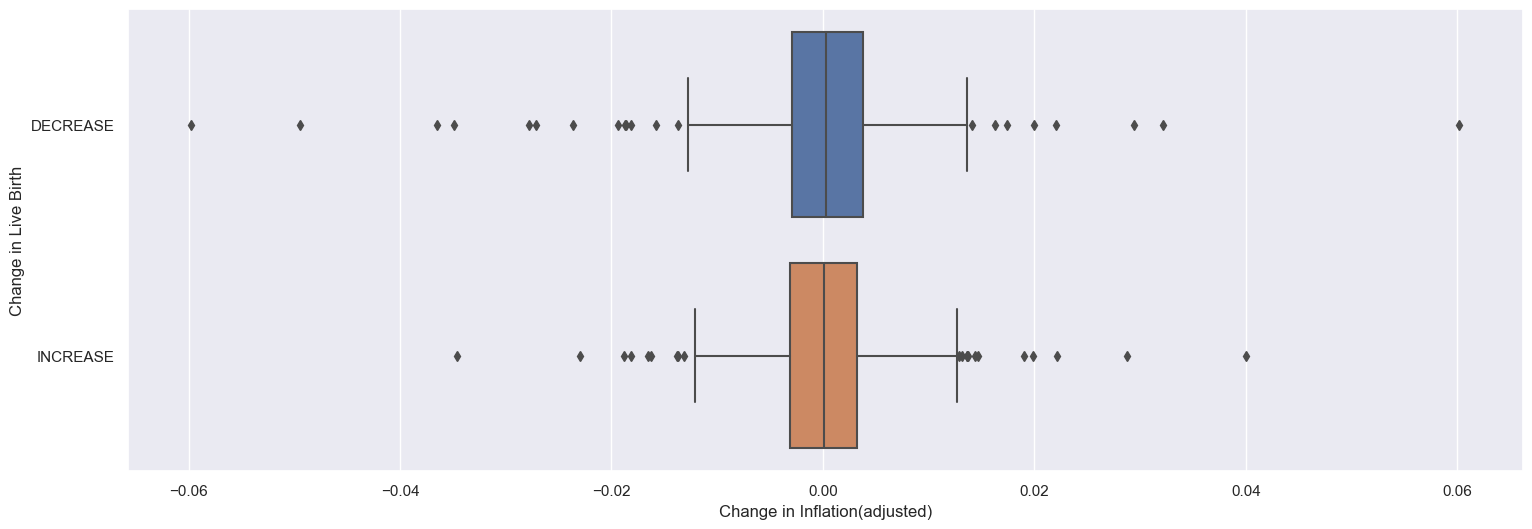

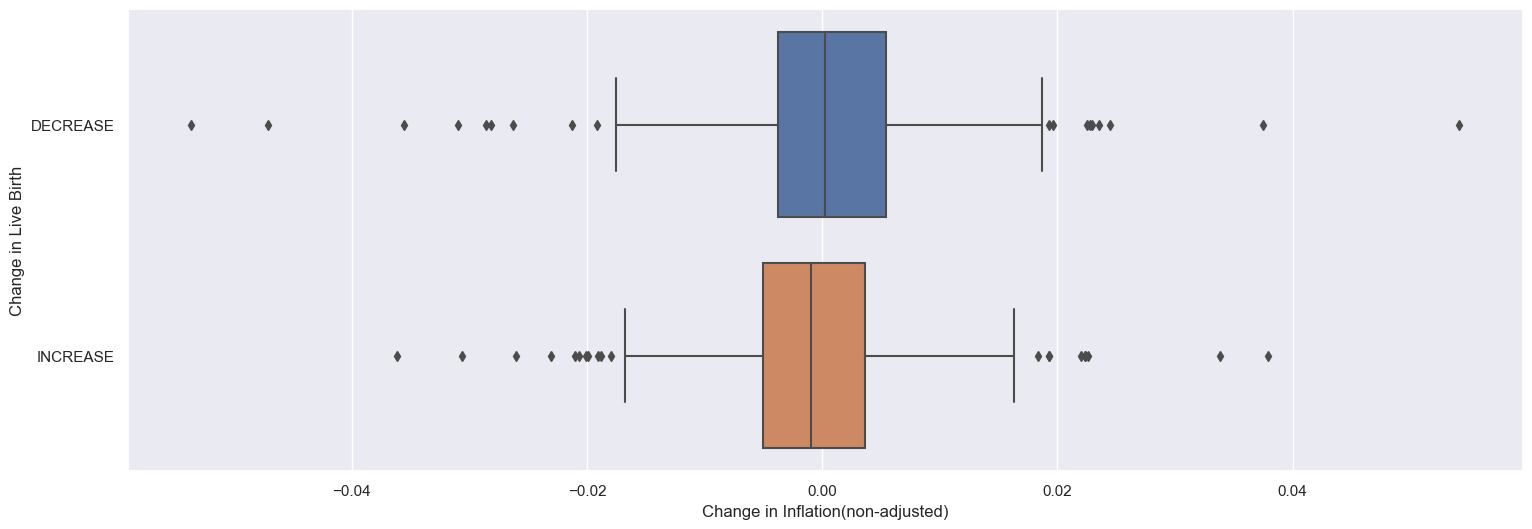

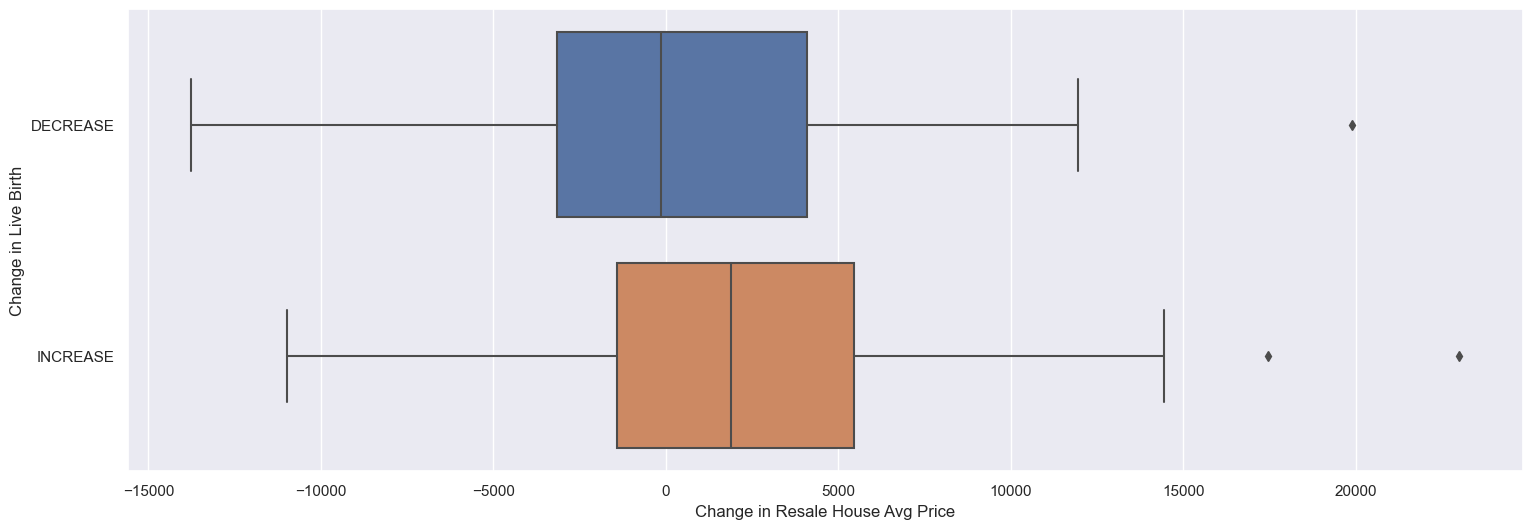

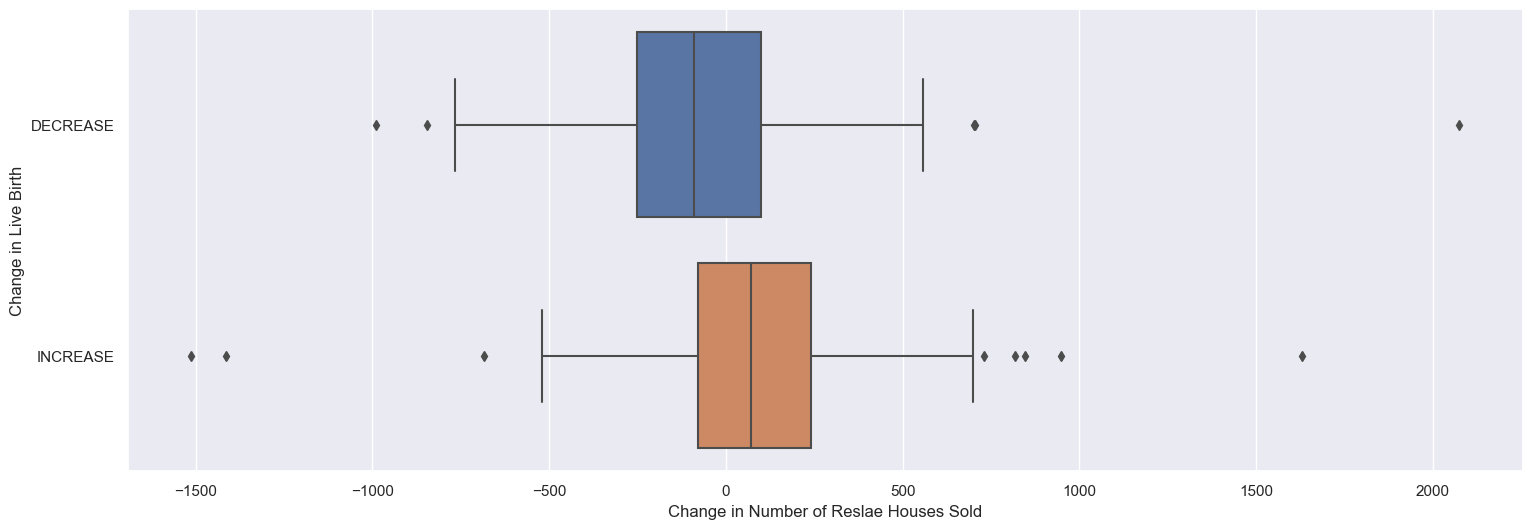

In [10]:
for col in combined_changed_data_together_overall_percent.columns[2:]:
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = col, y = "Change in Live Birth", data = combined_changed_data_together_overall, orient = "h")

In [11]:
combined_changed_data_together_overall.to_excel("Monthly Change Data.xlsx")
combined_changed_data_together_overall_percent.to_excel("Monthly % Change Data.xlsx")